In [2]:
import keras
import cv2
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential , load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from keras.utils import plot_model

In [30]:
(x_train , y_train) , (x_test ,y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000 , 28 , 28 , 1).astype('float32') / 255.0
x_test = x_test.reshape(x_test.shape[0] , 28 , 28 , 1).astype('float32') / 255.0
labels= ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
input_shape = (28 , 28 , 1)

y_train = keras.utils.to_categorical(y_train , 10)
y_test = keras.utils.to_categorical(y_test , 10)

In [10]:
def build_model(optimizer):
    model =Sequential()
    model.add(Conv2D(32, kernel_size= (3,3) , activation='relu' , input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(64, kernel_size= (3,3) , activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(100 , activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(10 , activation='softmax'))
    
    model.compile(loss='categorical_crossentropy' , optimizer=optimizer , metrics=['accuracy'])
    
    return model

In [11]:
rmsprops_model = build_model('rmsprop')
sgd_model = build_model('sgd')
epochs = 3
batch_size = 64
h_rms = rmsprops_model.fit(x_train , y_train , epochs=epochs , batch_size=batch_size)
h_sgd = sgd_model.fit(x_train , y_train , epochs=epochs , batch_size=batch_size)

Epoch 1/3
938/938 [==============================] - 17s 17ms/step - loss: 0.5865 - accuracy: 0.7879
Epoch 2/3
938/938 [==============================] - 15s 16ms/step - loss: 0.3852 - accuracy: 0.8634
Epoch 3/3
938/938 [==============================] - 15s 16ms/step - loss: 0.3351 - accuracy: 0.8796
Epoch 1/3
938/938 [==============================] - 15s 16ms/step - loss: 1.3762 - accuracy: 0.4995
Epoch 2/3
938/938 [==============================] - 16s 17ms/step - loss: 0.7808 - accuracy: 0.7088
Epoch 3/3
938/938 [==============================] - 16s 17ms/step - loss: 0.6722 - accuracy: 0.7491


In [15]:
score_rms = rmsprops_model.evaluate(x_test , y_test , verbose=0)
print(score_rms)

[0.3174870014190674, 0.8823000192642212]


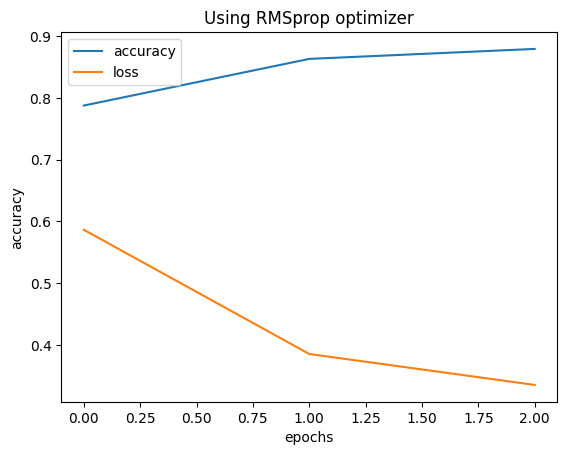

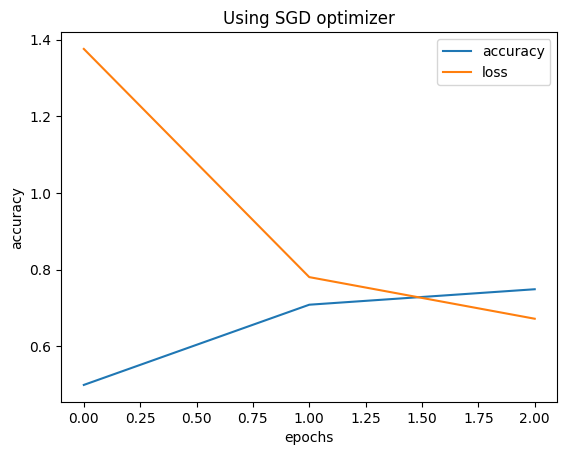

In [21]:
#plotting the accuracy and loss for both the optimizerS
#RMSprop
plt.plot(h_rms.history['accuracy'])
plt.plot(h_rms.history['loss'])
plt.title('Using RMSprop optimizer')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['accuracy' , 'loss'])
plt.show()

#SGD
plt.plot(h_sgd.history['accuracy'])
plt.plot(h_sgd.history['loss'])
plt.title('Using SGD optimizer')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['accuracy' , 'loss'])
plt.show()


In [34]:
def predict_image(model , image):
    image= image.reshape(1 , 28 , 28 ,1)
    pred = model.predict(image)
    predicted_label = np.argmax(pred)
    print(f"predicted label : {labels[predicted_label]}")

In [37]:
predict_image(rmsprops_model , x_test[0])

1/1 [==============================] - 0s 20ms/step
predicted label : Ankle boot
